컴퓨터 비전 1차 과제
- 과제 기한: 10월 18일 자정

- 과제명: 주어진 영상을 일고 4연결성/8연결성을 이용하여 영상을 라벨링하여 색칠하기

- 제출방법: colab에서 프로그램을 작성한 후 " .py" 확장자로 다운로드하여 가상대학에 제출하시기 바람

- 파일명: 학번.py

- 과제 제출 기한을 반드시 지키고, 이후에 제출시 감정



Python 버전 확인

In [ ]:
!python --version

Python 3.7.12


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
cv2.__version__

'4.1.2'

이미지 다운로드

In [ ]:
!wget https://i.imgur.com/iWGMlJR.png
!mv iWGMlJR.png sample.png

--2021-10-31 11:32:59--  https://i.imgur.com/iWGMlJR.png
Resolving i.imgur.com (i.imgur.com)... 151.101.248.193
Connecting to i.imgur.com (i.imgur.com)|151.101.248.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 491 [image/png]
Saving to: ‘iWGMlJR.png’

iWGMlJR.png         100%[===================>]     491  --.-KB/s    in 0s      

2021-10-31 11:32:59 (34.2 MB/s) - ‘iWGMlJR.png’ saved [491/491]



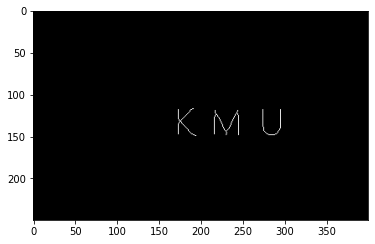

In [ ]:
img = cv2.imread('sample.png')

# image 출력
plt.imshow(img)
plt.show()

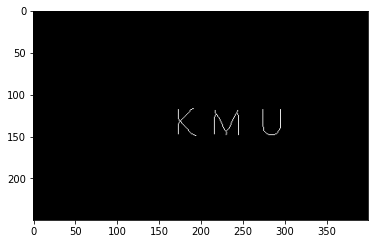

In [ ]:
img.shape
img_grayscale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # convert color (rgb to gray scale)
img_grayscale.shape
#print(type(img_grayscale))
#print(img_grayscale.max())
#print(img_grayscale.min())
plt.imshow(img_grayscale, cmap='gray')

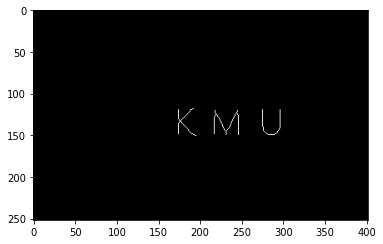

In [ ]:
from google.colab.patches import cv2_imshow
#cv2_imshow(img_grayscale)


# 영상 바깥으로 나가는 것 방지
# img_grayscale[0, :] = 0 # 첫번째 행
# img_grayscale[img_grayscale.shape[0]-1, :] = 0 # 마지막 행

# img_grayscale[:, 0] = 0 # 첫번쨰 열
# img_grayscale[:, img_grayscale.shape[1]-1] = 0 # 마지막 열


# gray scale image convert to binary image 
# (threshold 1 (which means background color 0, the others color not 0))
# any threshold value is okay for this image

p, q = img_grayscale.shape

# padding
img_binary = np.zeros((p+2, q+2), dtype=np.uint8) 
img_binary[1:p+1, 1:q+1] = img_grayscale.copy()

# img_binary = img_grayscale.copy()
# print(img_binary.max())
# print(img_binary.min())


threshold = 1
img_binary[img_binary < threshold] = 0
img_binary[img_binary >= threshold] = 1
plt.imshow(img_binary, cmap='gray')

# 4연결성과 8연결성 라벨링 출력 예시
## 숫자로 표시
![alt text](https://i.imgur.com/lQ9nXox.png)
## 색상으로 표시
![alt text](https://i.imgur.com/91M3MwP.png)

# 과제1: 4연결성 라벨링

- 위의 4연결성(4-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
- cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.

In [ ]:
# References: https://jstar0525.tistory.com/2

def find_labels(labels, r, c, neighbors): # check labels of neighbors
  tmp_labels = labels[r-1:r+2, c-1:c+2] * neighbors
  #print("tmp_labels", tmp_labels[np.nonzero(tmp_labels)])
  return np.sort(tmp_labels[np.nonzero(tmp_labels)])

In [ ]:
def connect(img_binary, connectivity):
  # 함수 작성
    equivalent = []
    labels = np.zeros_like(img_binary, dtype='int64') # img_binary 만큼의 픽셀 값을 0으로 셋팅하고, 그 레이블에 들어가는 데이터 타입
    # print(labels)
    next_label = 1

    # 1st pass
    for r in range(1, len(img_binary)-1): # padding하기 전의 사이즈
      for c, pixel in enumerate(img_binary[r]):
        #print(c, pixel)
        if pixel != 0: 
          neighbors = img_binary[r-1:r+2, c-1:c+2] * connectivity # element-wise multiplication
          #print(img_binary[r-1:r+2, c-1:c+2])
          # print("neighbors ", neighbors)
          num_neighbors = np.count_nonzero(neighbors)

          if num_neighbors == 0: # 새로운 레이블의 시작을 의미
            labels[r, c] = next_label # r, c 위치 픽셀의 label값을 next_label로 설정
            equivalent.append([next_label, next_label])
            next_label += 1 # 새롭게 시작되는 label값을 변경하기 위해 

          else: 
            L = find_labels(labels, r, c, neighbors)
            #print(L)
            labels[r, c] = np.min(L) #label값 중에서 min값으로 label값을 변경

            uni_L = np.unique(L)
            # print(uni_L)
            if len(uni_L) > 1: # 설정가능한 label 종류가 2가지 이상이라면
              for i, e in enumerate(equivalent):
                if uni_L[0] in e:
                  equivalent[i].extend(uni_L[1:])
                  equivalent[i] = list(sorted(set(equivalent[i])))
            #print(equivalent)

      # 2nd pass
      for e in equivalent:
        for f in reversed(e):
          labels[labels==f] = e[0] # e[0] is inserted at the location where the value is equivalent to f value
          # print(e, labels[labels==f])
    return  labels

In [ ]:
def four_connect(img_binary):
  connectivity_4 = np.array([[0,1,0], [1,0,0], [0,0,0]])
  return connect(img_binary, connectivity_4)

In [ ]:
labeled_img = four_connect(img_binary)
np.unique(labeled_img)
# labeled_img
# plt.imshow(labeled_img, cmap='gist_earth')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
neighbors  [[0 0 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [1 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [1 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 1 0]
 [0 0 0]
 [0 0 0]]
neighbors  [[0 0 0]
 [

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

과제2: 8연결성 라벨링
- 위의 8연결성(8-neighbors) 라벨링과 같이 숫자 또는 색을 이용하여 라벨링하시오.
- cf. 색의 종류에는 제한이 없고, 연결된 픽셀은 같은 숫자 또는 같은 색을 가져야함.-

In [ ]:
def eight_connect(img):
  connectivity_8 = np.array([[1,1,1], [1,0,0], [0,0,0]])
  return connect(img_binary, connectivity_8)

In [ ]:
#img = cv2.imread('sample.png')
labeled_img = eight_connect(img_binary)
np.unique(labeled_img)
# image 출력
# plt.imshow(labeled_img, cmap='gist_earth')
#plt.grid(None)   
#plt.xticks([])
#plt.yticks([])
#plt.show()

array([0, 1, 4, 6])

In [ ]:
def flood_fill4(img_binary, r, c, label):
  if img_binary[r][c] == -1:
    img_binary[r][c] = label
    flood_fill4(img_binary, r, c + 1, label); # east
    flood_fill4(img_binary, r - 1, c, label); # north
    flood_fill4(img_binary, r, c - 1, label); # west
    flood_fill4(img_binary, r + 1, c, label); # south
    # print(label)

In [ ]:
def flood_fill8(img_binary, r, c, label):
  if img_binary[r][c] == -1:
    img_binary[r][c] = label
    flood_fill8(img_binary, r, c + 1, label); # east
    flood_fill8(img_binary, r - 1, c, label); # north
    flood_fill8(img_binary, r, c - 1, label); # west
    flood_fill8(img_binary, r + 1, c, label); # south
    flood_fill8(img_binary, r - 1, c - 1, label); # ↖
    flood_fill8(img_binary, r - 1, c + 1, label); # ↗
    flood_fill8(img_binary, r + 1, c - 1, label); # ↙
    flood_fill8(img_binary, r + 1, c + 1, label); # ↘   

In [ ]:
# # connectivity_4 = np.array([[0,1,0], [1,0,0], [0,0,0]])

# def efficient_floodfill4(img_binary, r, c, label):
#   queue = []
#   queue.append([r, c])

#   while len(queue) != 0:
#     r, c = queue.pop(0)
#     if img_binary[r][c] == -1:
#       left = right = c
#       while img_binary[r][left-1] == -1: left -= 1
#       while img_binary[r][right+1] == -1: right += 1

#       for i in range(left, right+1):
#         img_binary[r][i] = label
#         if img_binary[r-1][i]==-1 and (i==left or img_binary[r-1][i-1]!=-1): queue.append([r-1, i])
#         if img_binary[r+1][i]==-1 and (i==left or img_binary[r+1][i-1]!=-1): queue.append([r+1, i])

In [ ]:
# # connectivity_8 = np.array([[1,1,1], [1,0,0], [0,0,0]])

# def efficient_floodfill8(img_binary, r, c, label):
#   queue = []
#   queue.append([r, c])

#   while len(queue) != 0:
#     r, c = queue.pop(0)
#     if img_binary[r][c] == -1:
#       left = right = c
#       while img_binary[r][left-1] == -1: left -= 1
#       while img_binary[r][right+1] == -1: right += 1

#       for i in range(left, right+1):
#         img_binary[r][i] = label
#         if (img_binary[r-1][i]==-1) and (i==left or (img_binary[r-1][i-1]==-1 and img_binary[r-1][i+1]==-1 and img_binary[r-1][i-2]!=-1)): queue.append([r-1, i])
#         if (img_binary[r+1][i]==-1) and (i==left or (img_binary[r+1][i-1]==-1 and img_binary[r+1][i+1]==-1 and img_binary[r+1][i-2]!=-1)): queue.append([r+1, i])

In [ ]:
def four_connect_book(img_binary):
  img_binary_copy = img_binary.copy().astype('int64')
  
  for r in range(img_binary_copy.shape[0]):
    for c in range(img_binary_copy.shape[1]):
      if img_binary_copy[r][c] == 1:
        img_binary_copy[r][c] =  -1

  # # flood fill (overflow)
  # img_binary_copy[0, :] = 0 # 첫번째 행
  # img_binary_copy[img_binary_copy.shape[0]-1, :] = 0 # 마지막 행

  # img_binary_copy[:, 0] = 0 # 첫번쨰 열
  # img_binary_copy[:, img_binary_copy.shape[1]-1] = 0 # 마지막 열

  label = 1
  for r in range(1, img_binary_copy.shape[0]-1):
    for c in range(1, img_binary_copy.shape[1]-1):
      if img_binary_copy[r][c] == -1:
        flood_fill4(img_binary_copy, r, c, label)
        label += 1
  return img_binary_copy

In [ ]:
def eight_connect_book(img_binary):
  img_binary_copy = img_binary.copy().astype('int64')
  
  for r in range(img_binary_copy.shape[0]):
    for c in range(img_binary_copy.shape[1]):
      if img_binary_copy[r][c] == 1:
        img_binary_copy[r][c] =  -1

  # # flood fill (overflow)
  # img_binary_copy[0, :] = 0 # 첫번째 행
  # img_binary_copy[img_binary_copy.shape[0]-1, :] = 0 # 마지막 행

  # img_binary_copy[:, 0] = 0 # 첫번쨰 열
  # img_binary_copy[:, img_binary_copy.shape[1]-1] = 0 # 마지막 열

  label = 1
  for r in range(1, img_binary_copy.shape[0]-1):
    for c in range(1, img_binary_copy.shape[1]-1):
      if img_binary_copy[r][c] == -1:
        flood_fill8(img_binary_copy, r, c, label)
        label += 1
  return img_binary_copy

In [ ]:
labeled_img = four_connect_book(img_binary)
np.unique(labeled_img)
# image 출력
# plt.imshow(labeled_img, cmap='gist_earth')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

In [ ]:
labeled_img = eight_connect_book(img_binary)
np.unique(labeled_img)
# image 출력
# plt.imshow(labeled_img, cmap='gist_earth')

array([0, 1, 2, 3])